# Task 3

##Import necessary libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

## Load the datasets

In [29]:
customers = pd.read_csv("/content/Customers.csv")
transactions = pd.read_csv("/content/Transactions.csv")

## Display the first few rows of each dataset


In [30]:
print("Customers Data:")
print(customers.head())
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


## Check for missing values


In [31]:
print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## Convert date columns to datetime


In [32]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

## Merge customer and transaction data


In [33]:
customer_transactions = pd.merge(customers, transactions, on='CustomerID')

## Create customer features


In [34]:
customer_features = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',    # Total quantity purchased
    'TransactionDate': 'nunique'  # Number of transactions
}).reset_index()

## Normalize features


In [35]:
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'TransactionDate']])

## Determine the optimal number of clusters using the Elbow Method



In [36]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features_scaled)
    inertia.append(kmeans.inertia_)

## Plot the Elbow Method


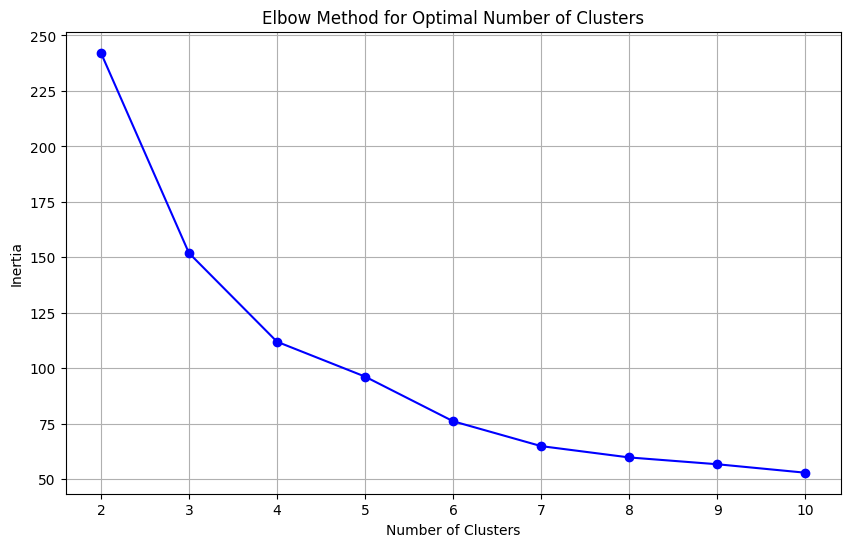

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o', color='blue')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

## Perform K-Means clustering with the optimal number of clusters

In [39]:
optimal_clusters = 4  # Based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features_scaled)

## Calculate Davies-Bouldin Index


In [40]:
db_index = davies_bouldin_score(customer_features_scaled, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.8650620583623065


## Visualize clusters


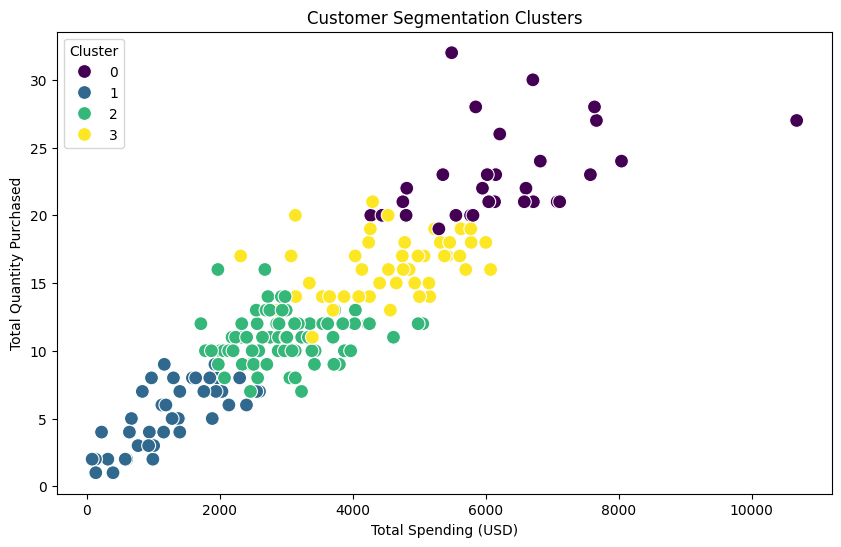

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='TotalValue', y='Quantity', hue='Cluster', palette='viridis', s=100)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Total Quantity Purchased")
plt.show()